In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import marimo as mo
from sklearn.linear_model import LinearRegression

In [2]:
base_dir = "/root/vllm/benchmarks/result"
replace_name = {
    "fcfs": "FCFS",
    "las": "LAS",
    "srjf": "SRJF",
    "sjf": "SJF",
    "tfittradeoff": "TFITTradeoff",
}

In [3]:
# _dates = ["20241205"]
# _counters = [[108,111]]
# _dates = ["20241202","20241203"]
# _counters= [[63,64,70,71,72,74],[75,76,77]]
# _dates=["20241213"]
# _counters=[[234,235]]
# _dates=["20241220"]
# # _counters=[[114, 118, 120]]
# _counters=[[137, 138, 139, 140, 141, 142, 143]]
_dates = ["20241220","20241221", "20241222", "20241223","20241224"]
# _counters=[[i for i in range(154,214)],[i for i in range(239, 242)]]
_counters = [[i for i in range(154,214)],[i for i in range(239, 242)], [i for i in range(243, 246)], [i for i in range(246, 247)],[248]]
schedule_policies = ["sjf","las","srjf","fcfs","tfittradeoff"]
execute_result_dir_names = []
for i in range(len(_dates)):
    _date = _dates[i]
    _counter = _counters[i]
    execute_result_dir_names.extend([os.path.join(base_dir, _date, str(counter)) for counter in _counter])

In [4]:
# For Motivation
execute_result_dfs_moti = {}
_detailed_result_df = pd.DataFrame()
for _dir_name in execute_result_dir_names:
    for _file in os.listdir(_dir_name):
        if (
            _file.endswith(".csv")
            and "_detailed" in _file
        ):
            temp_df = pd.read_csv(os.path.join(_dir_name, _file))
            
            _detailed_result_df = pd.concat([_detailed_result_df, temp_df], ignore_index=True)
            _detailed_result_df["gpu memory iter"] = (
                _detailed_result_df["gpu memory iter"]
            )
            _detailed_result_df["gpu computation iter"] = (
                _detailed_result_df["gpu computation iter"]
                / 6900
            )
            for policy in schedule_policies:
                if policy in _file:
                    execute_result_dfs_moti[policy.upper()]=_detailed_result_df

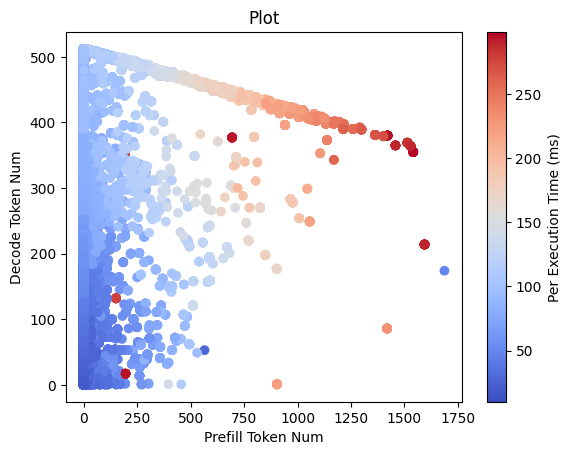

In [5]:
# 假设 _detailed_result_df 是一个pandas DataFrame，并且已经包含了相应的列
x = _detailed_result_df['prefill token num'].values
y = _detailed_result_df['decode token num'].values
z = _detailed_result_df['single execution time'].values * 1000

filtered_indices_2 = (z < 300) & (x < 4000)
x = x[filtered_indices_2]
y = y[filtered_indices_2]
z = z[filtered_indices_2]

filtered_indices_3 = (x > 2000) & (z < 150)
x = x[~filtered_indices_3]
y = y[~filtered_indices_3]
z = z[~filtered_indices_3]

fig, ax = plt.subplots()

colors = z 

sc = ax.scatter(x, y, c=colors, cmap='coolwarm', vmin=z.min(), vmax=z.max())

ax.set_xlabel('Prefill Token Num')
ax.set_ylabel('Decode Token Num')
ax.set_title('Plot')

plt.colorbar(sc, label='Per Execution Time (ms)')

plt.show()

/tmp/ipykernel_3292244/2020294103.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_avg = df_grouped.groupby('Group').mean()


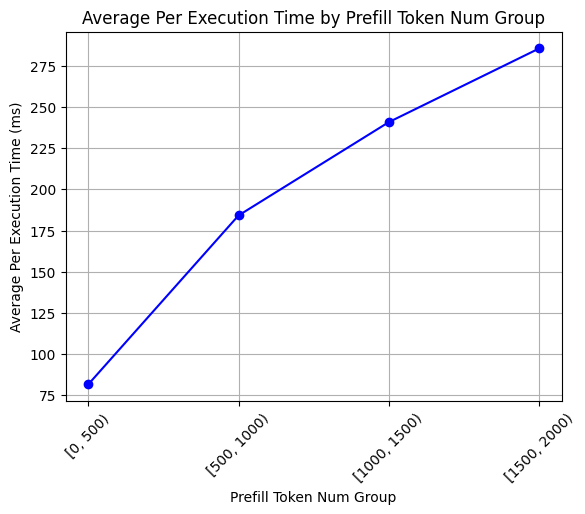

In [6]:
# 应用之前的过滤条件
# filtered_indices_2 = (z < 300) & (x < 4000)
# x = x[filtered_indices_2]
# z = z[filtered_indices_2]

# filtered_indices_3 = (x > 2000) & (z < 150)
# x = x[~filtered_indices_3]
# z = z[~filtered_indices_3]

filtered_indices_2 = x < 4000
x = x[filtered_indices_2]
z = z[filtered_indices_2]

# 使用pandas的cut函数将prefill token num分为每100一个区间的组
bins = np.arange(x.min(), x.max() + 500, 500)  # 定义分组的边界
grouped = pd.cut(x, bins=bins, right=False, include_lowest=True)

# 创建一个新的DataFrame，其中包含分组信息和per execution time
df_grouped = pd.DataFrame({'Group': grouped, 'PerExecutionTime': z})

# 计算每个组的平均per execution time
grouped_avg = df_grouped.groupby('Group').mean()

# 为了绘制折线图，我们需要将数据转换为matplotlib可以理解的格式
group_labels = grouped_avg.index.astype(str)  # 将分组标签转换为字符串
average_per_execution_time = grouped_avg['PerExecutionTime']

fig, ax = plt.subplots()

# 绘制折线图
ax.plot(group_labels, average_per_execution_time, marker='o', linestyle='-', color='b')

ax.set_xlabel('Prefill Token Num Group')
ax.set_ylabel('Average Per Execution Time (ms)')
ax.set_title('Average Per Execution Time by Prefill Token Num Group')

plt.xticks(rotation=45)  # 旋转x轴标签，以便更好地显示
plt.grid(True)
plt.show()

0      268640
2         102
3         139
4         171
5         225
        ...  
251        24
252        73
253        46
254        44
255        52
Name: count, Length: 255, dtype: int64


/tmp/ipykernel_3292244/3221703213.py:39: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped_corr = grouped_filtered.groupby('Group').apply(lambda x: x['DecodeTokenNum'].corr(x['Latency']))


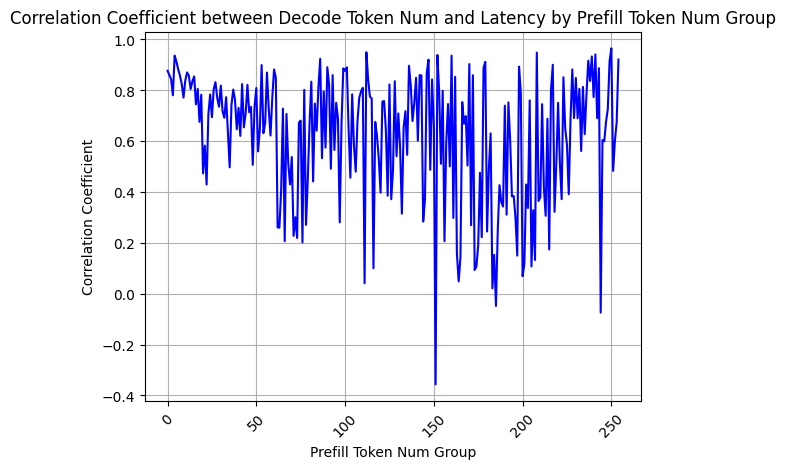

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 假设 _detailed_result_df 是一个pandas DataFrame，并且已经包含了相应的列
x = _detailed_result_df['prefill token num'].values
y = _detailed_result_df['decode token num'].values
z = _detailed_result_df['per execution time'].values * 1000  

filtered_indices_2 = (z < 300) & (x < 4000)
x = x[filtered_indices_2]
y = y[filtered_indices_2]
z = z[filtered_indices_2]

filtered_indices_3 = (x > 2000) & (z < 150)
x = x[~filtered_indices_3]
y = y[~filtered_indices_3]
z = z[~filtered_indices_3]

filtered_indices_4 = (x <256) & (y < 256)
x = x[filtered_indices_4]
y = y[filtered_indices_4]
z = z[filtered_indices_4]

sample_counts = pd.Series(x).value_counts().sort_index()
print(sample_counts)

# 使用pandas的cut函数将prefill token num分为每500一个区间的组
bins = np.arange(x.min(), x.max() + 1, 1)  # 定义分组的边界
grouped = pd.cut(x, bins=bins, right=False, include_lowest=True, labels=False)

# 创建一个新的DataFrame，其中包含分组信息，decode token num 和 per execution time
df_grouped = pd.DataFrame({'Group': grouped, 'DecodeTokenNum': y, 'Latency': z})

# 筛选出每个组中样本数大于或等于10的组
grouped_filtered = df_grouped.groupby('Group').filter(lambda x: len(x) >= 10)

# 计算每个组的相关性系数
grouped_corr = grouped_filtered.groupby('Group').apply(lambda x: x['DecodeTokenNum'].corr(x['Latency']))

group_labels = grouped_corr.index.astype(float) 
correlation_coefficients = grouped_corr.values


fig, ax = plt.subplots()

# # 绘制相关系数小于0的点
ax.plot(group_labels, correlation_coefficients, linestyle='-', color='b')
ax.set_xlabel('Prefill Token Num Group')
ax.set_ylabel('Correlation Coefficient')
ax.set_title('Correlation Coefficient between Decode Token Num and Latency by Prefill Token Num Group')

plt.xticks(rotation=45)  # 旋转x轴标签，以便更好地显示
plt.grid(True)
plt.show()

MSE:  0.010610187875062575
MAE 0.026196888134388956
R-squared:  0.4671005506336142
MSE:  0.010372482003993062
MAE 0.02380267605600222
R-squared:  0.4790393899167361
      total_token  per execution time
162           166            0.244658
163           167            0.228390
166           170            0.990089
167           171            0.183478
168           172            0.285915
...           ...                 ...
330           334            0.144915
341           345            1.216617
354           358            0.175342
357           361            0.142889
2282         4096            0.048248

[87 rows x 2 columns]


<Axes: xlabel='per execution time', ylabel='Proportion'>

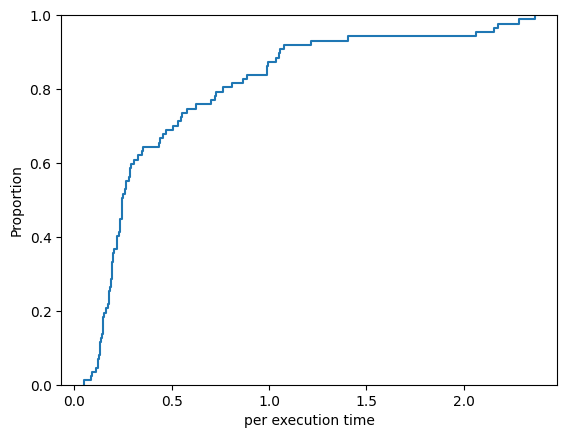

In [8]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

prefill_decode_latency = _detailed_result_df[["prefill token num", "decode token num", "per execution time"]].copy()
prefill_decode_latency=prefill_decode_latency.groupby(['prefill token num', 'decode token num'])['per execution time'].apply(lambda x: x.mean()).reset_index()
prefill_decode_latency.loc[:, "total_token"] = (
    prefill_decode_latency["prefill token num"] + prefill_decode_latency["decode token num"]
)
prefill_decode_latency = prefill_decode_latency[
    (prefill_decode_latency["per execution time"].notna()) & (prefill_decode_latency["prefill token num"])
]


def linear_regression(X, y):
    model = LinearRegression()
    model.fit(X, y)
    result = model.predict(X)
    print("MSE: ", mean_squared_error(y, result))
    print("MAE", mean_absolute_error(y, result))
    print("R-squared: ", model.score(X, y))


def get_cov(df, x, y):
    df = df.groupby([x])[y].apply(lambda x: x.std() / x.mean() if len(x)> 20 else -1).reset_index()
    df = df[df[y] != -1]
    return df


y = prefill_decode_latency["per execution time"]
linear_regression(prefill_decode_latency[["total_token"]], y)
linear_regression(prefill_decode_latency[["prefill token num", "decode token num"]], y)
cov_dist = get_cov(prefill_decode_latency[["total_token", "per execution time"]], "total_token", "per execution time")
print(cov_dist)
sns.ecdfplot(cov_dist['per execution time'])

In [9]:
prefill_decode_latency[prefill_decode_latency['total_token']==4096]

,prefill token num,decode token num,per execution time,total_token
26358,3917,179,0.651720,4096
26359,3929,167,0.624300,4096
26361,3933,163,0.642920,4096
26362,3939,157,0.611750,4096
26363,3943,153,0.613695,4096
26365,3945,151,0.640410,4096
26380,4027,69,0.595161,4096
26382,4029,67,0.591079,4096
26384,4033,63,0.628300,4096
26385,4035,61,0.649000,4096


/tmp/ipykernel_3292244/242514191.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped_corr = grouped_filtered.groupby('Group').apply(lambda x: x['DecodeTokenNum'].corr(x['Latency']))


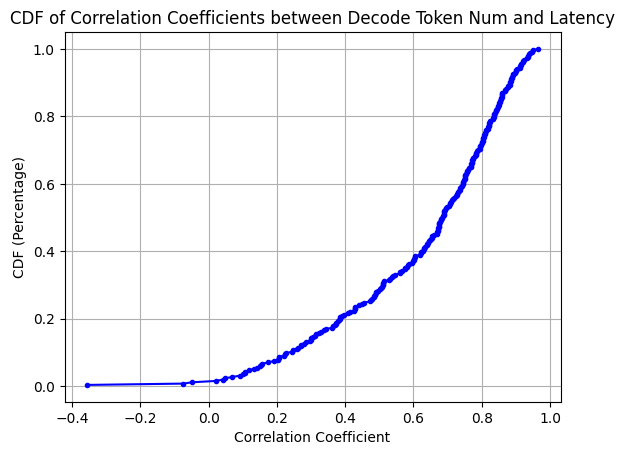

In [10]:
grouped_corr = grouped_filtered.groupby('Group').apply(lambda x: x['DecodeTokenNum'].corr(x['Latency']))

group_labels = grouped_corr.index.astype(str) 
correlation_coefficients = grouped_corr.values
correlation_coefficients = correlation_coefficients[~np.isnan(correlation_coefficients)]
# 计算累积分布函数（CDF）
sorted_coeffs = np.sort(correlation_coefficients)
cdf_values = np.arange(1, len(sorted_coeffs) + 1) / len(sorted_coeffs)

fig, ax = plt.subplots()

ax.plot(sorted_coeffs, cdf_values, marker='.', linestyle='-', color='b')

ax.set_xlabel('Correlation Coefficient')
ax.set_ylabel('CDF (Percentage)')
ax.set_title('CDF of Correlation Coefficients between Decode Token Num and Latency')

plt.grid(True)
plt.show()

/tmp/ipykernel_3292244/669369176.py:29: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_corr = df_grouped.groupby('Group').apply(lambda x: x['DecodeTokenNum'].corr(x['Latency'])).reset_index()
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
/tmp/ipykernel_3292244/669369176.py:29: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is 

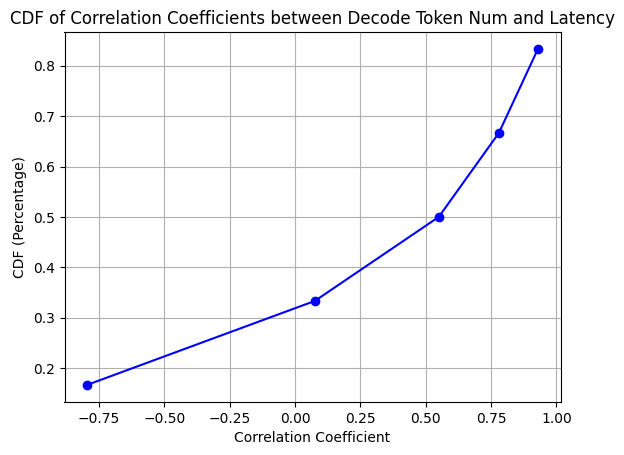

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 假设 _detailed_result_df 是一个pandas DataFrame，并且已经包含了相应的列
x = _detailed_result_df['prefill token num'].values
y = _detailed_result_df['decode token num'].values
z = _detailed_result_df['per execution time'].values * 1000  # 假设 latency 就是 per execution time

# 应用之前的过滤条件
filtered_indices_2 = (z < 300) & (x < 4000)
x = x[filtered_indices_2]
y = y[filtered_indices_2]
z = z[filtered_indices_2]

filtered_indices_3 = (x > 2000) & (z < 150)
x = x[~filtered_indices_3]
y = y[~filtered_indices_3]
z = z[~filtered_indices_3]

# 使用pandas的cut函数将prefill token num分为每500一个区间的组
bins = np.arange(x.min(), x.max() + 500, 500)  # 定义分组的边界，调整间距为500
grouped = pd.cut(x, bins=bins, right=False, include_lowest=True)

# 创建一个新的DataFrame，其中包含分组信息，decode token num 和 per execution time
df_grouped = pd.DataFrame({'Group': grouped, 'DecodeTokenNum': y, 'Latency': z})

# 计算每个组的相关性系数
grouped_corr = df_grouped.groupby('Group').apply(lambda x: x['DecodeTokenNum'].corr(x['Latency'])).reset_index()
grouped_corr.columns = ['Group', 'Correlation Coefficient']

# 为了绘制CDF图，我们需要将数据转换为matplotlib可以理解的格式
correlation_coefficients = grouped_corr['Correlation Coefficient'].values

# 计算累积分布函数（CDF）
sorted_coeffs = np.sort(correlation_coefficients)
cdf_values = np.arange(1, len(sorted_coeffs) + 1) / len(sorted_coeffs)

fig, ax = plt.subplots()

# 绘制CDF图
ax.plot(sorted_coeffs, cdf_values, marker='o', linestyle='-', color='b')

ax.set_xlabel('Correlation Coefficient')
ax.set_ylabel('CDF (Percentage)')
ax.set_title('CDF of Correlation Coefficients between Decode Token Num and Latency')

plt.grid(True)
plt.show()

## show the detailed analysis of the execution time in different stages

/tmp/ipykernel_3292244/4134622356.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  elapsed_time_diff_stage["total token num"] = (
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Figure size 1000x500 with 0 Axes>

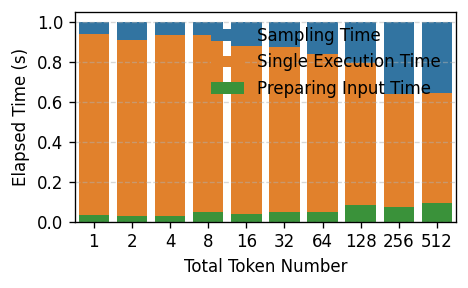

In [12]:
plt.figure(figsize=(10, 5))
elapsed_time_diff_stage = _detailed_result_df[
    [
        "prefill token num",
        "decode token num",
        "prepare input time",
        "compute logits time",
        "sample time",
        "single execution time",
    ]
]
elapsed_time_diff_stage["total token num"] = (
    elapsed_time_diff_stage["prefill token num"] + elapsed_time_diff_stage["decode token num"]
)

filter_1=np.floor(np.log2(elapsed_time_diff_stage["total token num"]))==np.log2(elapsed_time_diff_stage["total token num"])
filter_2=elapsed_time_diff_stage['total token num']>0 
filter_3=elapsed_time_diff_stage['prepare input time'].notna()
filter_4=elapsed_time_diff_stage['total token num']<4096

elapsed_time_diff_stage = elapsed_time_diff_stage[filter_1 & filter_2 & filter_3 & filter_4]

elapsed_time_diff_stage = elapsed_time_diff_stage.groupby(["total token num"]).mean().reset_index()
elapsed_time_diff_stage = elapsed_time_diff_stage.sort_values(by="total token num")
elapsed_time_diff_stage["total time"] = (
    elapsed_time_diff_stage["prepare input time"]
    + elapsed_time_diff_stage["compute logits time"]
    + elapsed_time_diff_stage["sample time"]
    + elapsed_time_diff_stage["single execution time"]
)
elapsed_time_diff_stage["prepare input time ratio"] = (
    elapsed_time_diff_stage["prepare input time"] 
)/elapsed_time_diff_stage['total time']
elapsed_time_diff_stage["single execution time ratio"] = (
    elapsed_time_diff_stage["single execution time"]
    + elapsed_time_diff_stage["compute logits time"]
    + elapsed_time_diff_stage["prepare input time"]
)/elapsed_time_diff_stage['total time']
elapsed_time_diff_stage["sample time ratio"] = (
    elapsed_time_diff_stage["total time"]
)/elapsed_time_diff_stage['total time']


plt.figure(figsize=(4, 2.5),dpi=120)
sns.barplot(data=elapsed_time_diff_stage, x="total token num", y="sample time ratio", label="Sampling Time")
sns.barplot(data=elapsed_time_diff_stage, x="total token num", y="single execution time ratio",label="Single Execution Time")
sns.barplot(data=elapsed_time_diff_stage, x="total token num", y="prepare input time ratio",label="Preparing Input Time")

plt.xlabel("Total Token Number")
plt.ylabel("Elapsed Time (s)")
plt.grid(True,linestyle='--', alpha=0.5, axis='y')
plt.legend(frameon=False)
plt.tight_layout()
plt.savefig("inference_elapsed_time.pdf")

## show the distribution of the swapping time with different number of tokens

In [13]:
swap_blocks_df = _detailed_result_df[['swap out block num','swap in block num','swap time','total iteration number']].copy()

In [14]:
selected_start_index =swap_blocks_df[swap_blocks_df['total iteration number']==1].index.tolist()
data_file_types = []
count=0
for i in range(len(selected_start_index)-1):
    data_file_types.extend([count]*(selected_start_index[i+1]-selected_start_index[i]))
    count+=1
data_file_types.extend([count]*(len(swap_blocks_df)-selected_start_index[-1]))
swap_blocks_df['data file type'] = data_file_types

def get_per_swap_time(df):
    df['per swap time'] = df['swap time'].diff()
    df['per swap out block num'] = df['swap out block num'].diff()*16
    df['per swap in block num'] = df['swap in block num'].diff()*16
    return df

per_swap_df = swap_blocks_df.groupby(['data file type']).apply(get_per_swap_time).reset_index(drop=True)
per_swap_df['total swap block num']=(per_swap_df['per swap in block num']+per_swap_df['per swap out block num'])*16
per_swap_df= per_swap_df.dropna()
per_swap_df=per_swap_df[per_swap_df['total swap block num']>0]
filtered_per_swap_df = per_swap_df.groupby(['total swap block num']).filter(lambda x: len(x) > 5)


/tmp/ipykernel_3292244/2402652696.py:16: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  per_swap_df = swap_blocks_df.groupby(['data file type']).apply(get_per_swap_time).reset_index(drop=True)


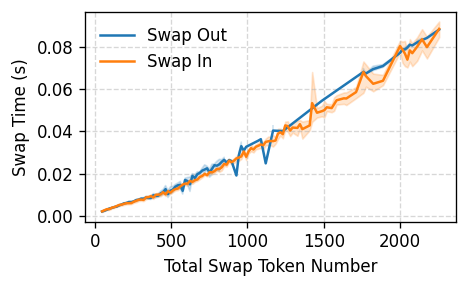

In [15]:
plt.figure(figsize=(4, 2.5),dpi=120)
# sns.lineplot(data=filtered_per_swap_df, x='total swap block num', y='per swap time')
sns.lineplot(data=filtered_per_swap_df[filtered_per_swap_df['per swap in block num']==0], x='per swap out block num', y='per swap time', label='Swap Out')
sns.lineplot(data=filtered_per_swap_df[filtered_per_swap_df['per swap out block num']==0], x='per swap in block num', y='per swap time', label='Swap In')
plt.xlabel('Total Swap Token Number')
plt.ylabel('Swap Time (s)')
plt.grid(True,linestyle='--', alpha=0.5)
plt.legend(frameon=False)
plt.tight_layout()
plt.savefig("transfer_time.pdf")

/tmp/ipykernel_3292244/2402061855.py:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  swap_in_time_cov = per_swap_in_time.groupby(['per swap in block num']).apply(lambda row: get_swap_time_cov(row)).reset_index()
/tmp/ipykernel_3292244/2402061855.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  swap_out_time_cov = per_swap_out_time.groupby(['per swap out block num']).apply(lambda row: get_swap_time_cov

   per swap in block num         0
0                   48.0  0.635148
1                   64.0  0.619845
2                   80.0  0.616576
3                   96.0  0.606571
4                  112.0  0.596401


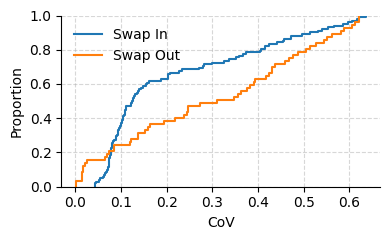

In [16]:
from scipy import stats
per_swap_in_time = filtered_per_swap_df[filtered_per_swap_df['per swap out block num']==0]
per_swap_out_time = filtered_per_swap_df[filtered_per_swap_df['per swap in block num']==0]
def get_swap_time_cov(row):
    if len(row)<5:
        return -1
    swap_time=row['per swap time']
    
    result = np.std(swap_time)/np.mean(swap_time)
    # result = stats.kurtosis(swap_time)
    # result = stats.skew(swap_time)
    return result 

swap_in_time_cov = per_swap_in_time.groupby(['per swap in block num']).apply(lambda row: get_swap_time_cov(row)).reset_index()
swap_out_time_cov = per_swap_out_time.groupby(['per swap out block num']).apply(lambda row: get_swap_time_cov(row)).reset_index()
print(swap_in_time_cov.head())
swap_in_time_cov = swap_in_time_cov[swap_in_time_cov[0]!=-1]
swap_out_time_cov = swap_out_time_cov[swap_out_time_cov[0]!=-1]
plt.figure(figsize=(4,2.5))
sns.ecdfplot(data=swap_in_time_cov[0], label='Swap In')
sns.ecdfplot(data=swap_out_time_cov[0], label='Swap Out')
plt.xlabel('CoV')
plt.legend(frameon=False)
plt.grid(True, ls='--', alpha=0.5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.savefig('./swap_time_cov.pdf', bbox_inches='tight')